# LeNet 5

Research Paper Link :- https://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf

![LeNet5 Architecture](https://upload.wikimedia.org/wikipedia/commons/3/35/LeNet-5_architecture.svg)

### Imports

In [15]:
import tensorflow as tf

import os
# Add BEFORE importing tensorflow
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
# os.environ['LD_LIBRARY_PATH'] = ''  # Clear conflicting library paths

print("TensorFlow version:", tf.__version__)
print("Built with CUDA:", tf.test.is_built_with_cuda())
print("\nPhysical devices:")
print(tf.config.list_physical_devices())
print("\nGPU devices specifically:")
print(tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.21.0-dev20260121
Built with CUDA: True

Physical devices:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

GPU devices specifically:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

In [17]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))
!nvidia-smi


Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Thu Jan 22 17:31:08 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.195.03             Driver Version: 570.195.03     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA RTX PRO 500 Black...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   38C    P4              7W /   50W |    1827MiB /   6113MiB |     22%      Default |
|                                         |       

In [18]:
# Test moving tensors to GPU
with tf.device('/GPU:0'):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)

print("Computation result:")
print(c)

# Check which device the tensor is on
print(f"\nTensor device: {c.device}")

# More detailed test
print("\n--- GPU Memory Info ---")
print(tf.config.experimental.get_memory_info('GPU:0'))

Computation result:
tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)

Tensor device: /job:localhost/replica:0/task:0/device:GPU:0

--- GPU Memory Info ---
{'current': 2597632, 'peak': 532957184}


## Loading the dataset and perform splitting



In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Peforming reshaping operation
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [20]:
x_train.shape[0]

60000

In [21]:
x_test.shape[0]

10000

### Normalization

In [22]:
# Be sure that all the pixels is in 0-1
x_train = x_train / 255
x_test = x_test / 255

### One Hot Encoding the Labels

In [23]:
# Moving to cathegorical format
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [24]:
y_test[100]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

### Network Structure

In [ ]:
# Building the Model Architecture

# As a sequential Network:
model = Sequential()

# in original LeNet5 tanh activation was used... Here ReLU is used for better performance 
                                                                                     #INPUT: 28 x 28 x 1 
                                                                                     # output of each layer...
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1))) # 24 x 24 x 6
model.add(MaxPooling2D(pool_size=(2, 2)))                                            # 12 x 12 x 6
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))                         # 8 x 8 x 16
model.add(MaxPooling2D(pool_size=(2, 2)))                                            # 4 x 4 x 16
model.add(Conv2D(120, kernel_size=(5, 5), activation='relu', padding='same'))        # 4 x 4 x 120 (bacause padding=same, remain same dimension)
# after convolution, flattened for dense network input 
model.add(Flatten())
model.add(Dense(84, activation='relu'))
# since multi-class classification probleem, softmax as last activation
model.add(Dense(10, activation='softmax'))

In [ ]:
# summarize network 
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │       161,364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,906 (831.66 KB)

 Trainable params: 212,906 (831.66 KB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [ ]:
# loss as categorical cross entropy (one hot encoding output)
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
# fit to train the model, with specified batch size and epochs 
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20


I0000 00:00:1769099486.896181   31276 dot_merger.cc:481] Merging Dots in computation: a_inference_one_step_on_data_49975__.35


465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8114 - loss: 0.6133

I0000 00:00:1769099490.091912   31274 dot_merger.cc:481] Merging Dots in computation: a_inference_one_step_on_data_49975__.35


469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9158 - loss: 0.2753 - val_accuracy: 0.9716 - val_loss: 0.0869
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9791 - loss: 0.0671 - val_accuracy: 0.9860 - val_loss: 0.0426
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9852 - loss: 0.0460 - val_accuracy: 0.9847 - val_loss: 0.0457
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9880 - loss: 0.0371 - val_accuracy: 0.9889 - val_loss: 0.0353
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.9870 - val_loss: 0.0421
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9921 - loss: 0.0250 - val_accuracy: 0.9885 - val_loss: 0.0386
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9930 - loss: 0.0207 - val_accuracy: 0.9887 - val_loss: 0.0376
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9942 - loss: 0.0185 - val_accuracy: 0.9913 - val

### Results

In [ ]:
# visualize performances of the model 
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9916 - loss: 0.0382
Test Loss: 0.038242045789957047
Test accuracy: 0.991599977016449


### Visualize Results

5


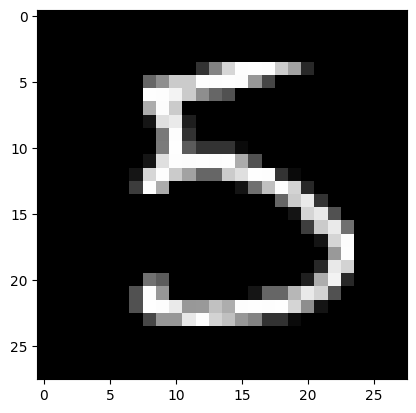

In [47]:
import matplotlib.pyplot as plt
import numpy as np

data_idx = 15
img = np.array(x_test[data_idx, :, :, 0])

plt.imshow(img, cmap='grey')

predict = model(tf.convert_to_tensor(x_test[data_idx:data_idx+1]))
print(np.argmax(predict))
